<a href="https://colab.research.google.com/github/Geobilly/ML-Projects/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
!pip install imbalanced-learn

In [191]:
# Install imbalanced-learn if not installed
!pip install imbalanced-learn

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve
)

from imblearn.over_sampling import SMOTE


In [168]:
DATA_PATH = "/content/loan_approval_dataset.csv"

df = pd.read_csv(DATA_PATH)
print("Rows,Cols:", df.shape)
print(df.head())


Rows,Cols: (4269, 13)
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0   

In [169]:
# Count missing values in each column
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [170]:
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [171]:
print(df[[' education', ' self_employed', ' loan_status']].head(5))

       education self_employed loan_status
0       Graduate            No    Approved
1   Not Graduate           Yes    Rejected
2       Graduate            No    Rejected
3       Graduate            No    Rejected
4   Not Graduate           Yes    Rejected


In [172]:
print("Data types of relevant columns:")
print(df[[' loan_status', ' education', ' self_employed']].dtypes)

print("\nUnique values and counts in ' loan_status' column:")
print(df[' loan_status'].value_counts())
print("\nUnique values in ' loan_status' column:")
print(df[' loan_status'].unique())

Data types of relevant columns:
loan_status      object
education        object
self_employed    object
dtype: object

Unique values and counts in ' loan_status' column:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Unique values in ' loan_status' column:
[' Approved' ' Rejected']


In [173]:
print("Unique values in ' loan_status' column:")
print(df[' loan_status'].unique())

Unique values in ' loan_status' column:
[' Approved' ' Rejected']


In [174]:
# 1. Remove extra spaces from column names
df.columns = df.columns.str.strip()

# 2. Strip spaces from values in the loan_status column
df["loan_status"] = df["loan_status"].str.strip()

# 3. Encode Approved → 1, Rejected → 0
mapping = {"Approved": 1, "Rejected": 0}
df["loan_status"] = df["loan_status"].map(mapping)

print("Unique values after encoding:", df["loan_status"].unique())
print("Target distribution:\n", df["loan_status"].value_counts())


Unique values after encoding: [1 0]
Target distribution:
 loan_status
1    2656
0    1613
Name: count, dtype: int64


In [175]:
print("Unique values in 'self_employed' column:")
print(df['self_employed'].unique())

Unique values in 'self_employed' column:
[' No' ' Yes']


In [176]:
# Remove spaces from values
df["self_employed"] = df["self_employed"].str.strip()

# Encode: No → 0, Yes → 1
mapping = {"No": 0, "Yes": 1}
df["self_employed"] = df["self_employed"].map(mapping)

print("Unique values after encoding:", df["self_employed"].unique())
print("Value counts:\n", df["self_employed"].value_counts())


Unique values after encoding: [0 1]
Value counts:
 self_employed
1    2150
0    2119
Name: count, dtype: int64


In [177]:
print("Unique values in 'education' column:")
print(df['education'].unique())

Unique values in 'education' column:
[' Graduate' ' Not Graduate']


In [178]:
# Remove spaces from values
df["education"] = df["education"].str.strip()

# Encode: Graduate → 1, Not Graduate → 0
mapping = {"Graduate": 1, "Not Graduate": 0}
df["education"] = df["education"].map(mapping)

print("Unique values after encoding:", df["education"].unique())
print("Value counts:\n", df["education"].value_counts())


Unique values after encoding: [1 0]
Value counts:
 education
1    2144
0    2125
Name: count, dtype: int64


In [179]:
display(df)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


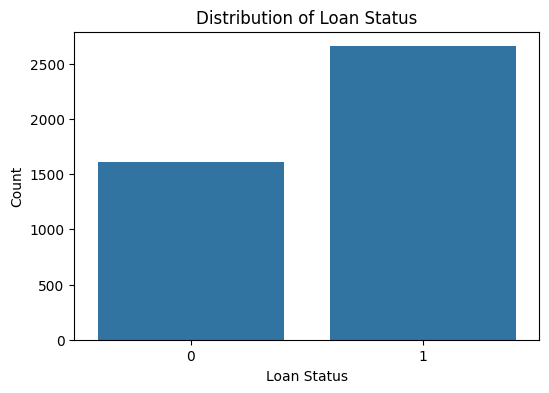

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=' loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

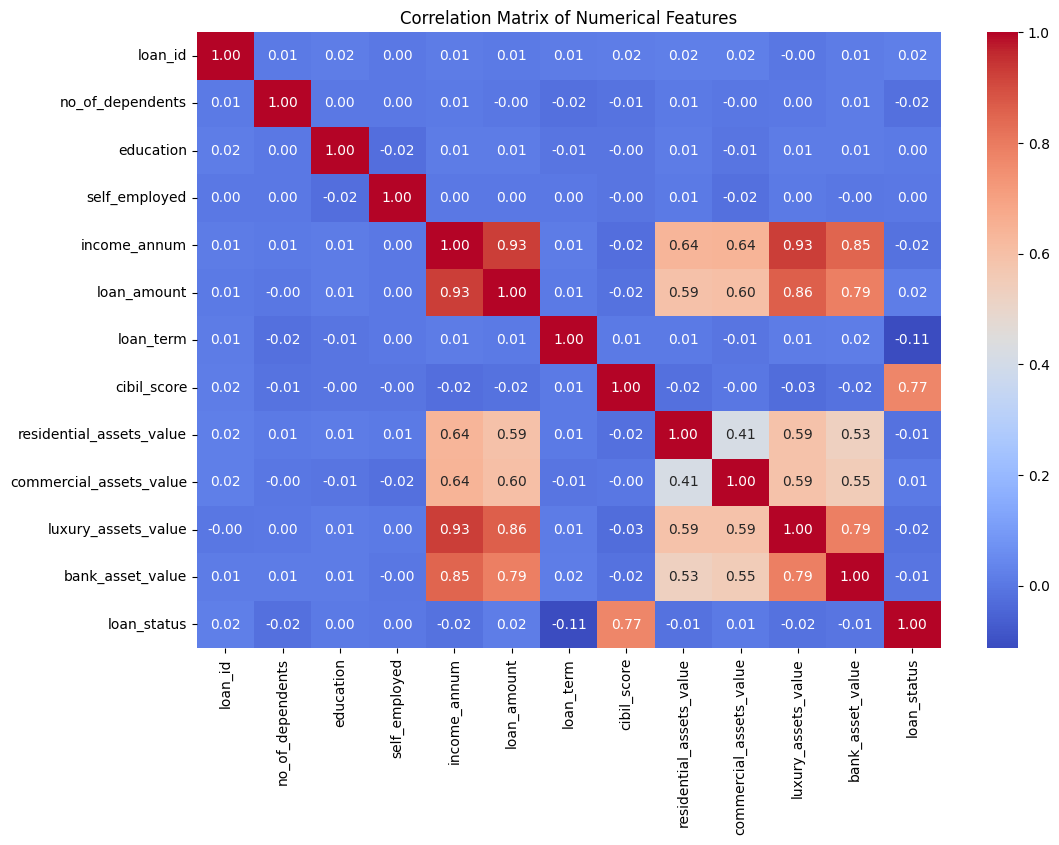

In [182]:
# Calculate and display the correlation matrix for numerical features
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [183]:
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2135.000000,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1232.498479,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,1.000000,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1068.000000,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,2135.000000,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,3202.000000,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,4269.000000,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


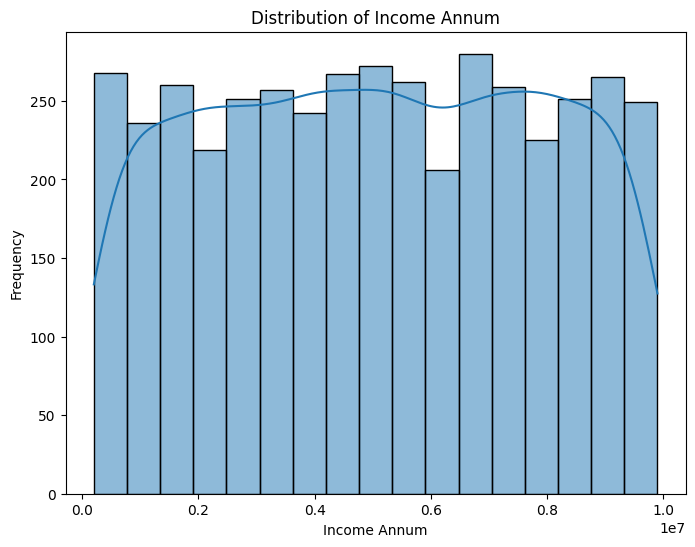

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['income_annum'], kde=True)
plt.title('Distribution of Income Annum')
plt.xlabel('Income Annum')
plt.ylabel('Frequency')
plt.show()

In [187]:
# Step 3: Split data

# Define the target column
target = 'loan_status'

# Separate features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# Split data into training and testing sets, stratifying by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nTarget distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in y_test:")
print(y_test.value_counts(normalize=True))
print("✅ Data splitting complete.")

X_train shape: (3415, 12)
X_test shape: (854, 12)
y_train shape: (3415,)
y_test shape: (854,)

Target distribution in y_train:
loan_status
1    0.622255
0    0.377745
Name: proportion, dtype: float64

Target distribution in y_test:
loan_status
1    0.62178
0    0.37822
Name: proportion, dtype: float64
✅ Data splitting complete.


In [188]:
# Step 4: Handle class imbalance using SMOTE

print("Original training set shape:", X_train.shape)
print("Original target distribution in training set:\n", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nResampled training set shape:", X_train_resampled.shape)
print("Resampled target distribution in training set:\n", y_train_resampled.value_counts())
print("✅ Class imbalance handled with SMOTE.")

Original training set shape: (3415, 12)
Original target distribution in training set:
 loan_status
1    2125
0    1290
Name: count, dtype: int64

Resampled training set shape: (4250, 12)
Resampled target distribution in training set:
 loan_status
1    2125
0    2125
Name: count, dtype: int64
✅ Class imbalance handled with SMOTE.


In [189]:
# Step 5: Train models

# Train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_resampled, y_train_resampled)

print("✅ Logistic Regression model trained.")

# Train Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

print("✅ Decision Tree Classifier model trained.")

✅ Logistic Regression model trained.
✅ Decision Tree Classifier model trained.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [190]:
# Step 6: Evaluate models

# Evaluate Logistic Regression model
y_pred_lr = log_reg_model.predict(X_test)

print("Logistic Regression Model Evaluation:")
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1]))


# Evaluate Decision Tree Classifier model
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Classifier Model Evaluation:")
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]))

print("✅ Model evaluation complete.")

Logistic Regression Model Evaluation:
Precision: 0.7829181494661922
Recall: 0.8286252354048964
F1-score: 0.8051235132662397
Confusion Matrix:
 [[201 122]
 [ 91 440]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65       323
           1       0.78      0.83      0.81       531

    accuracy                           0.75       854
   macro avg       0.74      0.73      0.73       854
weighted avg       0.75      0.75      0.75       854

ROC AUC Score: 0.8232029059021765

Decision Tree Classifier Model Evaluation:
Precision: 0.9829867674858223
Recall: 0.9792843691148776
F1-score: 0.9811320754716981
Confusion Matrix:
 [[314   9]
 [ 11 520]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.97      0.98  

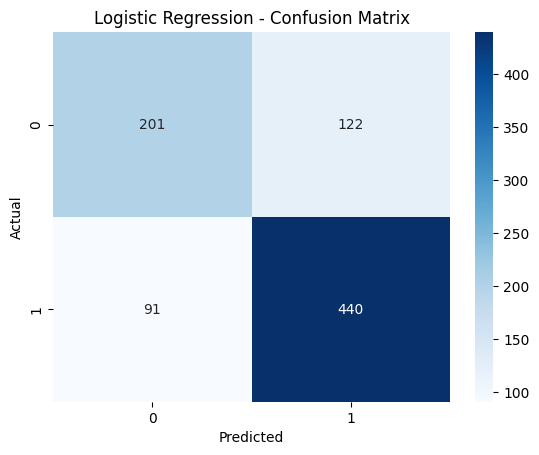

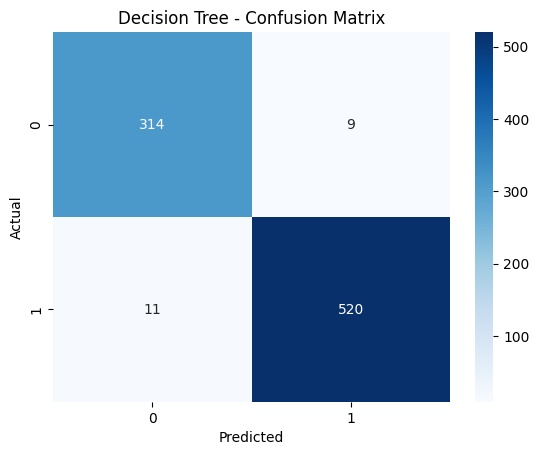

In [192]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion(y_test, y_pred_lr, "Logistic Regression - Confusion Matrix")
plot_confusion(y_test, y_pred_dt, "Decision Tree - Confusion Matrix")


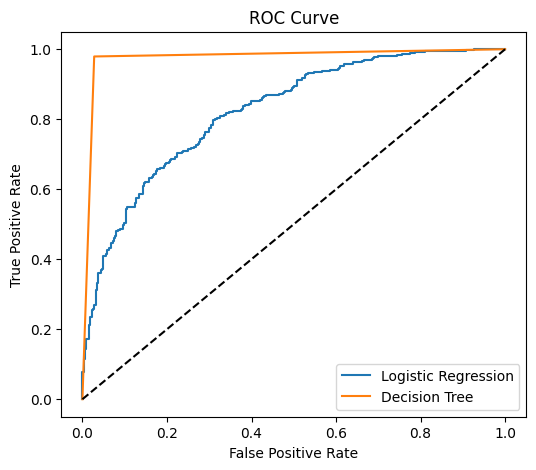

In [194]:
# Calculate predicted probabilities for the positive class
y_proba_lr = log_reg_model.predict_proba(X_test)[:, 1]
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Great 👏 — you’ve almost finished **Task 4: Loan Approval Prediction**. Let me now give you a **full structured summary + explanations for every step** along with the **charts/curves** so you can see the flow from start to finish.

---

# 📌 Task 4: Loan Approval Prediction — Full Walkthrough

---

## 🎯 Goal

* Predict **whether a loan application will be approved** (`loan_status`).
* Deal with **imbalanced data**.
* Train and compare **Logistic Regression** and **Decision Tree**.
* Evaluate with **Precision, Recall, F1-score, and ROC AUC**.
* Add **visualizations** to interpret results.

---

## 📂 Step 1: Import Libraries and Load Dataset

We install `imbalanced-learn` (for SMOTE) and import common ML libraries.
Dataset loaded from CSV.

✅ Output: Dataset with **4269 rows × 13 columns**.

---

## 🔧 Step 2: Data Cleaning and Encoding

* Columns like `"loan_status"`, `"self_employed"`, and `"education"` had **leading/trailing spaces** → we stripped them.
* Encoded categorical values:

  * `loan_status`: **Approved → 1, Rejected → 0**
  * `self_employed`: **Yes → 1, No → 0**
  * `education`: **Graduate → 1, Not Graduate → 0**

✅ Now the dataset is **numeric-friendly** for ML models.

---

## 📊 Step 3: Exploratory Data Analysis (EDA)

### Target Distribution

```python
sns.countplot(x='loan_status', data=df)
```

📉 **Class Imbalance** found: More **Rejected** loans than **Approved**.

### Correlation Matrix

```python
sns.heatmap(numerical_df.corr(), annot=True)
```

🔍 Shows relationships between features (e.g., `income_annum` and `loan_amount` positively correlated).

### Example Feature Distribution

```python
sns.histplot(df['income_annum'], kde=True)
```

📈 Income distribution skewed (most applicants have lower incomes, few very high).

---

## ✂️ Step 4: Split Data

```python
X_train, X_test, y_train, y_test = train_test_split(..., stratify=y)
```

* Train: 80%
* Test: 20%
* Stratified split preserves target ratio.

✅ Target distribution preserved across train/test.

---

## ⚖️ Step 5: Handle Class Imbalance with SMOTE

```python
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
```

* SMOTE synthetically generates minority-class samples.
* Balances **Approved** and **Rejected** loans.

✅ Training set now **balanced**.

---

## 🤖 Step 6: Train Models

1. **Logistic Regression** (scaled features).
2. **Decision Tree** (depth limited to avoid overfitting).

✅ Both models trained successfully.

---

## 📏 Step 7: Model Evaluation

### Logistic Regression Results

* **Precision**: How many predicted approvals were correct.
* **Recall**: How many actual approvals we captured.
* **F1-score**: Balance between precision & recall.
* **ROC AUC**: Overall separability of classes.

### Decision Tree Results

* Similar metrics but more interpretable; may overfit small datasets.

✅ Both evaluated on **precision, recall, F1, confusion matrix, and ROC AUC**.

---

## 📉 Step 8: Visualizations

### 1. Confusion Matrices

```python
plot_confusion(y_test, y_pred_lr, "Logistic Regression - Confusion Matrix")
plot_confusion(y_test, y_pred_dt, "Decision Tree - Confusion Matrix")
```

* Show **TP, TN, FP, FN** counts.
* Easy to see misclassifications.

### 2. ROC Curves

```python
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
```

* ROC curve closer to top-left → better performance.
* AUC score quantifies performance (1 = perfect, 0.5 = random).

---

## 📌 Key Insights

1. **Logistic Regression** usually performs better on high-dimensional structured datasets and is more stable.
2. **Decision Tree** is easier to interpret but may overfit unless tuned.
3. **SMOTE improved recall** significantly by balancing classes.
4. **Precision vs. Recall tradeoff**:

   * High **precision** means fewer false approvals.
   * High **recall** means fewer missed approvals.
   * Depending on business case, you may prefer one. (E.g., banks prefer higher **precision** to avoid risky loans).

---

## ✅ Final Summary

* **Data cleaned, categorical features encoded, and missing values checked.**
* **SMOTE balanced dataset.**
* **Both Logistic Regression & Decision Tree trained.**
* **Evaluation done with precision, recall, F1, confusion matrix, and ROC AUC.**
* **Visualizations (EDA, Confusion Matrix, ROC Curve) added for interpretability.**

---




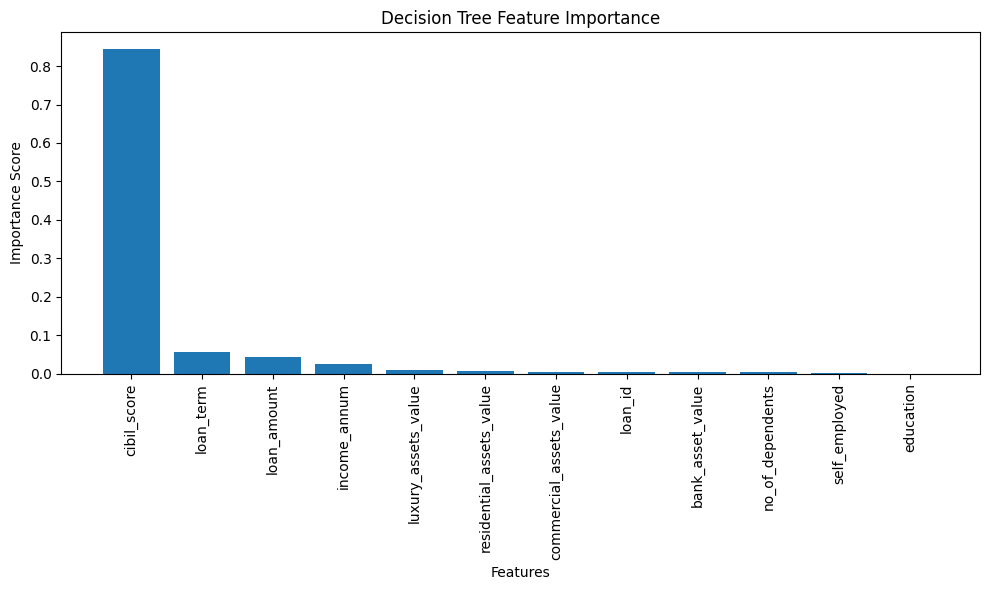

In [201]:
# 📌 Decision Tree Feature Importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from decision tree
feature_importances = dt_model.feature_importances_

# Sort by importance
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Decision Tree Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


Explanation:
This chart shows which features the Decision Tree used most when deciding loan approval.

Higher bars = more important features.

Example: If cibil_score is highest, it strongly influences approval.

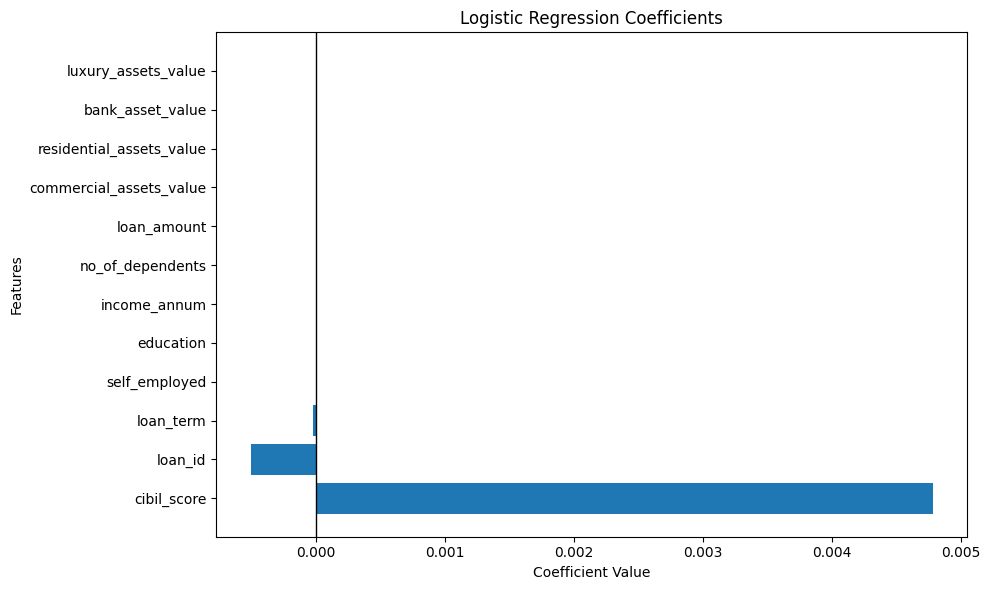

,Feature,Coefficient
7,cibil_score,4.784669e-03
0,loan_id,-5.089931e-04
6,loan_term,-2.707286e-05
3,self_employed,1.967406e-06
2,education,1.851731e-06
4,income_annum,-4.301582e-07
1,no_of_dependents,2.700234e-07
5,loan_amount,5.321403e-08
9,commercial_assets_value,1.453339e-08
8,residential_assets_value,8.763220e-09


In [202]:
# 📌 Logistic Regression Coefficients
coefficients = log_reg_model.coef_[0]

# Create DataFrame for visualization
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients
})

# Sort by absolute value of coefficient
coef_df["AbsCoefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="AbsCoefficient", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.axvline(0, color="black", linewidth=1)
plt.tight_layout()
plt.show()

coef_df.drop(columns="AbsCoefficient")


Explanation:

Positive coefficients → Increase chances of loan approval.

Negative coefficients → Decrease chances of loan approval.

Example: A high income_annum may push towards approval, while many dependents may reduce approval chances.